In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')

In [264]:
data=pd.read_csv('aggregate_covid_country.csv',parse_dates=["Date"])

In [265]:
data

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [266]:
data.head(10)

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
5,2020-01-22,Antigua and Barbuda,0,0,0
6,2020-01-22,Argentina,0,0,0
7,2020-01-22,Armenia,0,0,0
8,2020-01-22,Australia,0,0,0
9,2020-01-22,Austria,0,0,0


In [267]:
data.tail(20)

,Date,Country,Confirmed,Recovered,Deaths
23668,2020-05-26,Thailand,3045,2929,57
23669,2020-05-26,Timor-Leste,24,24,0
23670,2020-05-26,Togo,391,177,13
23671,2020-05-26,Trinidad and Tobago,116,108,8
23672,2020-05-26,Tunisia,1051,929,48
23673,2020-05-26,Turkey,158762,121507,4397
23674,2020-05-26,US,1680913,384902,98913
23675,2020-05-26,Uganda,253,69,0
23676,2020-05-26,Ukraine,21584,7575,644
23677,2020-05-26,United Arab Emirates,31086,15982,253


In [268]:
data.keys()

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [269]:
data.describe()

,Confirmed,Recovered,Deaths
count,2.368800e+04,23688.000000,23688.000000
mean,7.969368e+03,2581.801714,526.935030
std,5.842109e+04,15143.101257,3992.815956
min,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000,0.000000
50%,1.800000e+01,1.000000,0.000000
75%,7.300000e+02,123.000000,13.000000
max,1.680913e+06,384902.000000,98913.000000


In [270]:
data.shape

(23688, 5)

In [271]:
df=pd.DataFrame(data=data)
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [272]:
df.shape

(23688, 5)

In [273]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

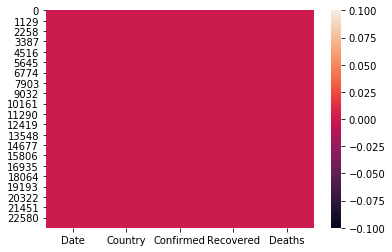

In [274]:
sns.heatmap(df.isnull())

In [275]:
df.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

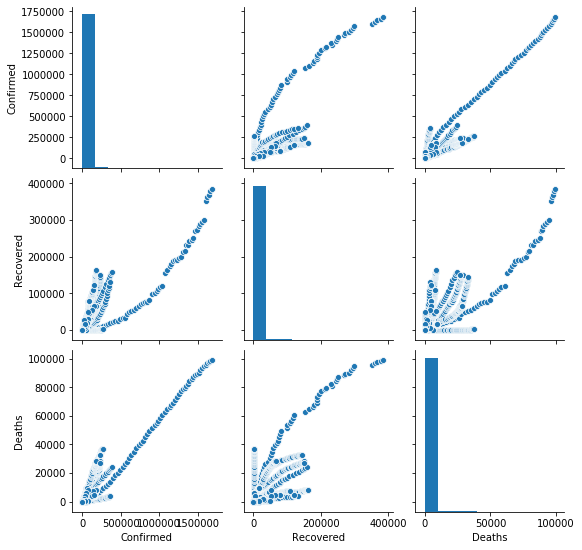

In [276]:
sns.pairplot(df)

Confirmed       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Recovered    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Deaths        AxesSubplot(0.44569,0.536818;0.133621x0.343182)
dtype: object

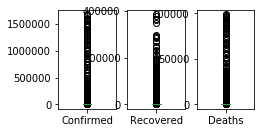

In [277]:
df.plot(kind='box',subplots=True, layout=(2,5))

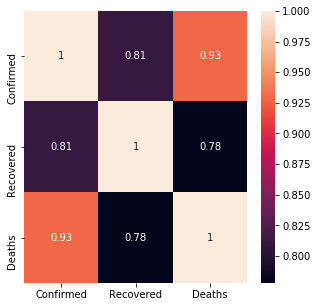

In [278]:
corr_hmap=df.corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr_hmap,annot=True)
plt.show()

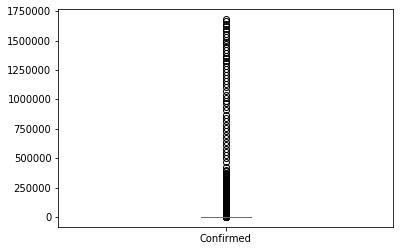

In [279]:
df['Confirmed'].plot.box()

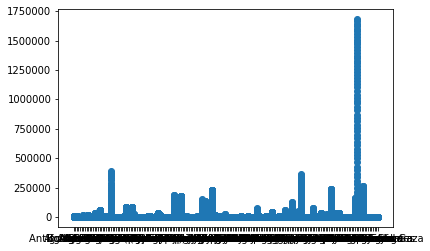

In [280]:
plt.scatter(df.iloc[:,1],df.iloc[:,2])
plt.show()

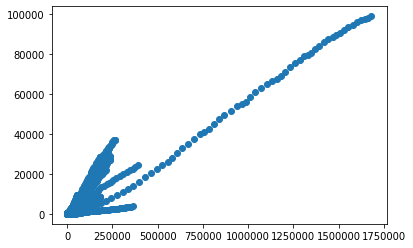

In [281]:
plt.scatter(df.iloc[:,2],df.iloc[:,4])
plt.show()

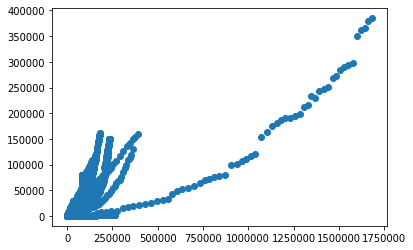

In [282]:
plt.scatter(df.iloc[:,2],df.iloc[:,3])
plt.show()

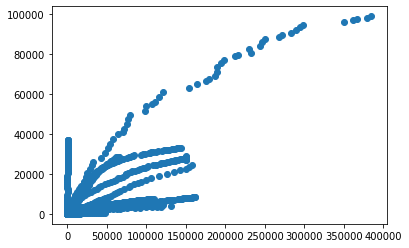

In [283]:
plt.scatter(df.iloc[:,3],df.iloc[:,4])
plt.show()

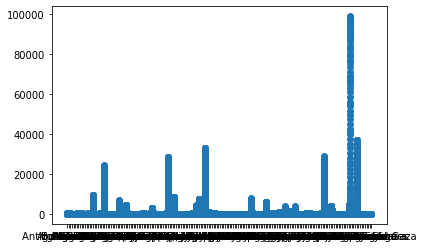

In [284]:
plt.scatter(df.iloc[:,1],df.iloc[:,4])
plt.show()

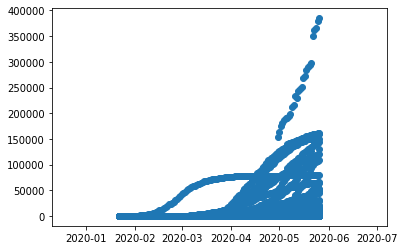

In [285]:
plt.scatter(df.iloc[:,0],df.iloc[:,3])
plt.show()

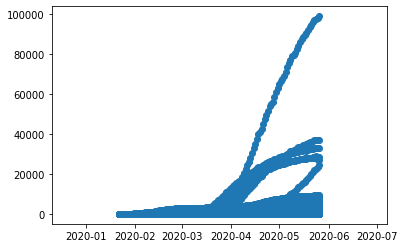

In [286]:
plt.scatter(df.iloc[:,0],df.iloc[:,4])
plt.show()

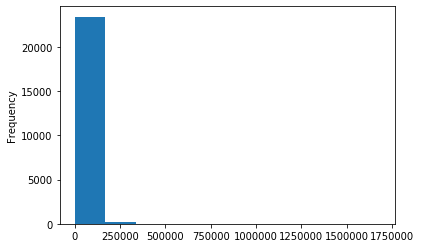

In [287]:
df['Confirmed'].plot.hist()

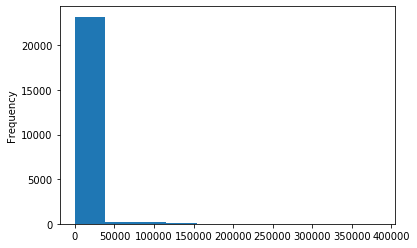

In [288]:
df['Recovered'].plot.hist()

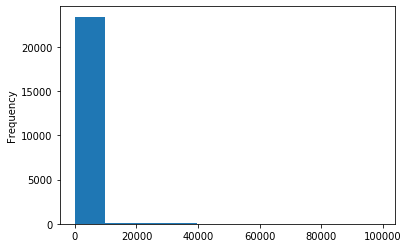

In [289]:
df['Deaths'].plot.hist()

In [290]:
df.drop('Date',axis=1,inplace=True)

In [291]:
df.drop('Country',axis=1,inplace=True)

In [292]:
df.skew()

Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

In [293]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [294]:
df.skew()

Confirmed    0.538470
Recovered    1.011590
Deaths       1.598833
dtype: float64

In [295]:
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(23688, 3)
(23288, 3)


In [296]:
df_final.columns

Index(['Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [297]:
x=df_final.iloc[:,:-1].values
x

array([[0.        , 0.        ],
       [0.        , 0.        ],
       [0.        , 0.        ],
       ...,
       [5.52146092, 2.39789527],
       [6.82546004, 5.82008293],
       [4.04305127, 3.25809654]])

In [298]:
y=df_final.iloc[:,-1].values
y

array([0.        , 0.        , 0.        , ..., 3.91202301, 2.07944154,
       1.60943791])

In [299]:
x.shape

(23288, 2)

In [300]:
y.shape

(23288,)

In [301]:
from sklearn import linear_model

In [302]:
max_r_score=0
for r_state in range(76,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state: ",r_state,"is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score correspondint to: ",final_r_state,"is ",max_r_score)


r2_score corresponding to random state:  76 is:  0.820977687565916
r2_score corresponding to random state:  77 is:  0.8315646768121894
r2_score corresponding to random state:  78 is:  0.8165993537938284
r2_score corresponding to random state:  79 is:  0.8210855509689419
r2_score corresponding to random state:  80 is:  0.8125344431087587
r2_score corresponding to random state:  81 is:  0.825235175989754
r2_score corresponding to random state:  82 is:  0.8225823446528812
r2_score corresponding to random state:  83 is:  0.8214887307573429
r2_score corresponding to random state:  84 is:  0.8199408443707238
r2_score corresponding to random state:  85 is:  0.8141354584650893
r2_score corresponding to random state:  86 is:  0.8277558768869575
r2_score corresponding to random state:  87 is:  0.8239871876169952
r2_score corresponding to random state:  88 is:  0.824158794222533
r2_score corresponding to random state:  89 is:  0.8208092383342345
r2_score corresponding to random state:  90 is:  0.

r2_score corresponding to random state:  77 is:  0.8315646768121894

In [303]:
x_train.shape

(18630, 2)

In [304]:
y_train.shape

(18630,)

In [305]:
lr.coef_

array([0.27915391, 0.34060506])

In [306]:
lr.intercept_

-0.3598826159335531

In [307]:
cross_val_score(lr,x,y,cv=10,scoring='r2').mean()

0.45441797507554843

In [308]:
cross_val_score(lr,x,y,cv=10,scoring='r2').std()

0.41374654698451624

In [309]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=77)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

The above lr is going to be our final output

In [310]:
print("r2 score is : ",r2_score(y_test,y_pred))
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is :  0.8315646768121894
RMSE is :  0.8973015810898652


In [311]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=77)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
ADA= AdaBoostRegressor()
ADA.fit(x_train,y_train)
print(ADA.score(x_train,y_train))
ADApred=ADA.predict(x_test)
print(ADApred)
ADA.score(x_test,y_test)

0.897030584345202
[4.59947162 1.80730844 5.25249087 ... 0.63367362 0.08897762 0.08897762]


0.8996744544389592

In [312]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=77)
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
GBR= GradientBoostingRegressor(n_estimators=1000,learning_rate=.1)
GBR.fit(x_train,y_train)
GBR.score(x_test,y_test)

0.9207050723422795

In [313]:
from sklearn.externals import joblib

In [314]:
joblib.dump(GBR,'Model_COVID19_Dataset.csv')

['Model_COVID19_Dataset.csv']

In [315]:
model=joblib.load('Model_COVID19_Dataset.csv')

In [316]:
GBR.predict(x_test)

array([4.90062231e+00, 1.63974307e+00, 5.80067665e+00, ...,
       3.57634940e-01, 1.13158288e-01, 9.82532562e-04])